### 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline    
        #### %matplotlib helps show the plot inline

### 1. Import data

In [2]:
taxi_jan_2019 = pd.read_csv('data/yellow_tripdata_2019-01.csv')
taxi_data = pd.concat([taxi_jan_2019])
       #### The concatination function helps should additional months is added to the dataset considering only January 2019 data is used.

In [3]:
print(taxi_data.shape)
taxi_data.head()
       #### This shows the first 5 rows of the dataset.

(7667792, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [4]:
taxi_data.dtypes
   #### Shows the data types

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

### 2. Data exploration

In [5]:
taxi_data.columns
     #### This shows the colums of the dataset. Part of the essence of exploration is to pick the important columns needed for the analysis. Please, consult the column dictionary for the meaning of each column. The README.md file contains link to the dictionary.

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [6]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]
      #### These columns are important for this work considering this project is predicting the average income of a taxi driver in NYC.

In [7]:
taxi_data.head()
      #### Getting the first 5 rows again to incoporate the chosen columns.

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


array([[<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

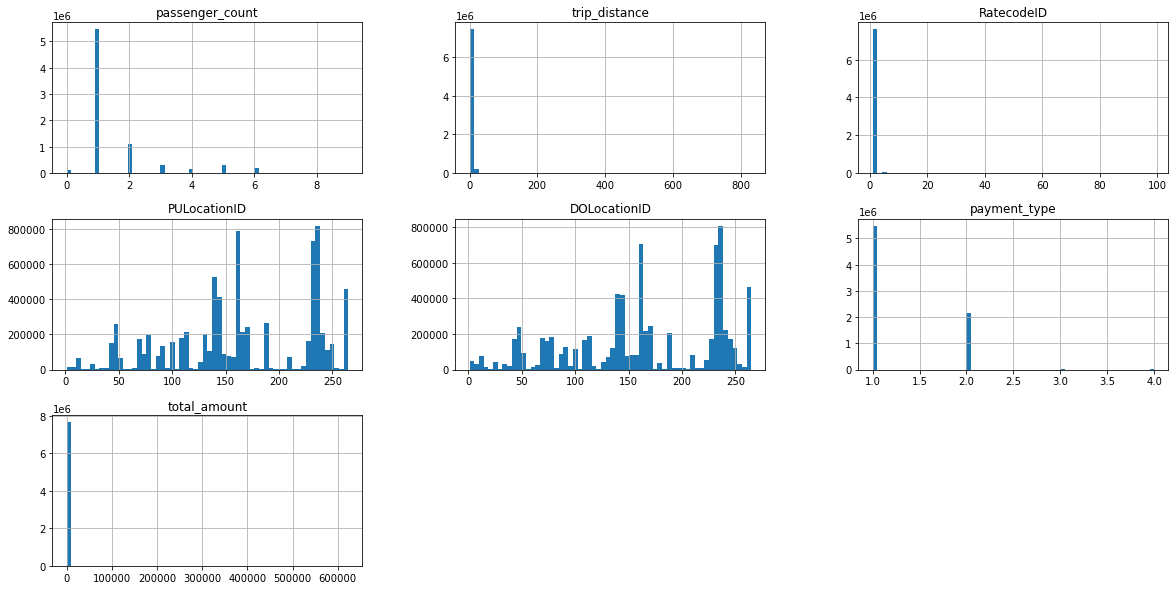

In [8]:
taxi_data.hist(figsize=(20,10), bins=60)
      #### The first step in this exploration is plotting with a histogram which gives an overall idea what might be wrong with the dataset. 

In [9]:
taxi_data['RatecodeID'].value_counts()
      #### Another way other than histogram to visualize the RatecodeID which shows in which area the taxi trip happened. Meaning more people are in "1".

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

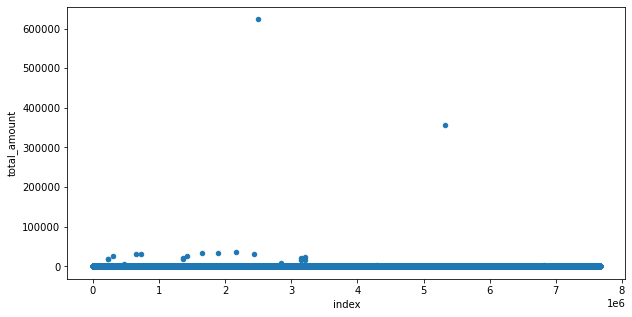

In [10]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
      #### Plotting total_amount considering the hist. visual for total_amount seem outrageous because it is highly inconceivable you think someone would pay $600,000 for a taxi.

<AxesSubplot:xlabel='index', ylabel='total_amount'>

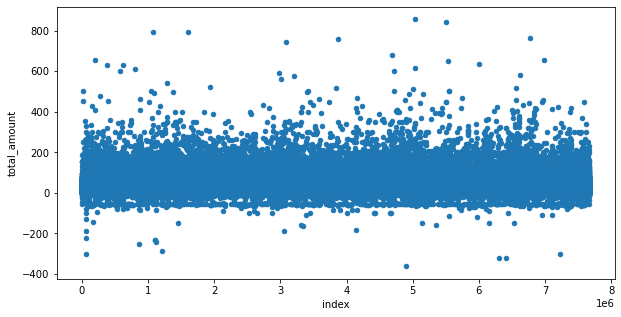

In [11]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
      #### From the above visual, very few values are very high which could be outliers. However, I take a look at values below 1000. Below visual shows majority of action is happening around 200.

#### Two things to deal with. The outliers and the negative values. First, I take a look at the negative values.

(7131, 9)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

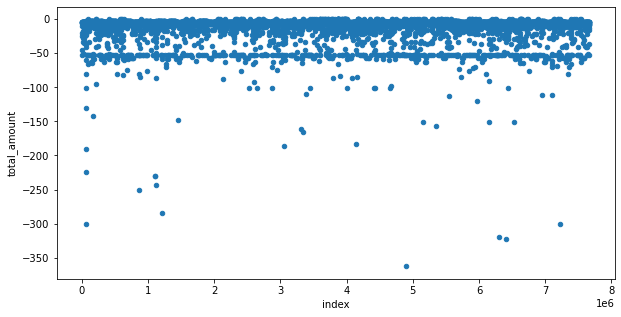

In [12]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
     #### To deal with the negative values in the above visual, first I want to know how many they are whic is 7131 as you see below. Then I can decide to delete them or not considering the dataset total is more than 7 million data points, the negatives are insignificant at this point.

In [13]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


In [14]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()
    #### To understand if there is anything that raises eyebrows about the negative values. The first thing that came to mind is payment_type. As indicated above considering the negative values, only one passenger paid with credit card which returned nill and this might be an inputation error. From the dictionary, 3 and 4 shows a dispute and no charge respectively which are vague. Therefore, the data points are deleted.

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

<AxesSubplot:>

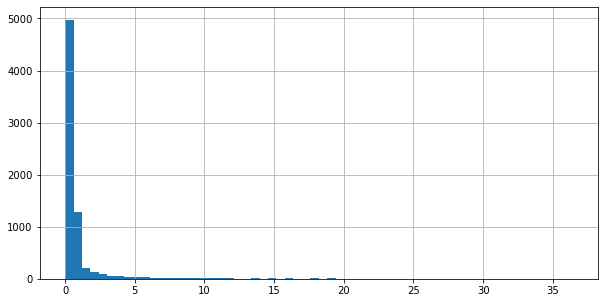

In [15]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))
      #### Below deleting the negative values, I take a look at the trip-distance which shows majority of the trips happened close to zero. Hence, I got rid of the negative values. It raises a bit of curiocity tho why someone would pay zero dollars for a trip.

In [16]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()
     #### To check howmany zero values are there. 1414 is not a big amount in a 7 million data points so they can be removed. 

(1414, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [17]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()
    #### This shows the payments were mostly with a credit card and cash.

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

<AxesSubplot:>

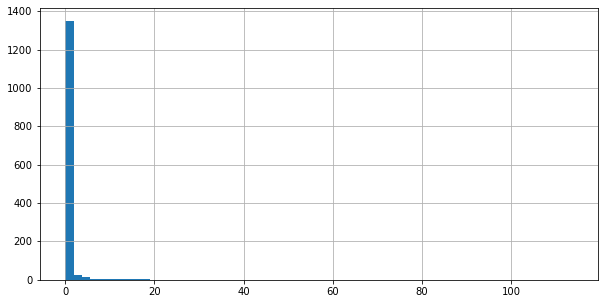

In [18]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))
     #### Looking at trip_distance for more info. confirms that most trip within a 0 - 1 mileradius ended up in a dispute or no charge.

In [19]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()
    #### This confirms my statement above meaning the trip did not workout. Therefore, I said goodbye to the zero values.

0.00     1270
0.01        4
1.00        4
0.02        4
0.03        3
         ... 
17.60       1
1.20        1
1.33        1
1.75        1
3.20        1
Name: trip_distance, Length: 110, dtype: int64

### The last thing in data exploration

#### Looking at the very high total_amount values

<AxesSubplot:>

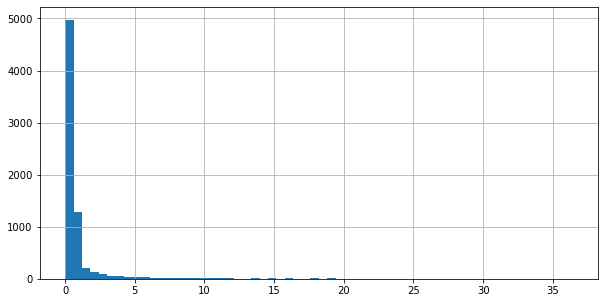

In [20]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

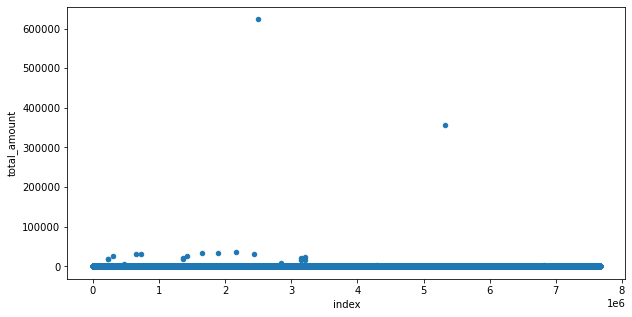

In [21]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [22]:
taxi_data[taxi_data['total_amount']>200].shape
#### To assume a 200 value safe point where any data above this assumption is ascribed as outrageous. Turns out there are only 1166 and this helps in limiting the prediction range.

(1166, 9)

In [23]:
taxi_data['total_amount'].mean()
#### To see the mean amount people are paying out of all the data points is around $16. Next is data cleaning.

15.68222215991253

## 3. Data cleaning

In [24]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]
             #### Getting rid of negative values, zeros, and values below 200.

In [25]:
print(taxi_data.shape)
taxi_data_filtered.shape
             #### Just checking to make sure nothing is wrong with the dataset considering a few thousand datapoints which returns 7659490 after filtering negative and high values.

(7667792, 9)


(7659490, 9)

##### Checked for missing values

In [26]:
taxi_data_filtered.isna().sum()
        #### This shows the amount of missing values for each feature. As shown, there are no missing values as the results return zero for each.

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

### 4. Data preparation

In [27]:
taxi_data_prepared = taxi_data_filtered.copy()
       #### Copied the filtered taxi_data into the prepared taxi_data frame because it is important to name your dataframe with a descriptive names to avoid giving the dataset long names to make sure it is understandable by skaeholders of the information which is you. Therefore, copying the data helps should there be an error in the line of code, you do not have to start afresh to run all lines of code again. On the other hand, you could ask why didn't I just equal the filtered dataset to the prepared dataset? Just like Deep vs Shallow copy, copying to shallow goes to the address/location where the taxi_data filtered is stored but deep copying, (.copy) copies everything and creates a new dataframe. So when changes are made to the original one, the new one won't be affected.

#### Making sure everything is in the right type

In [28]:
taxi_data_prepared.dtypes
      #### The first thing here is to understand the data types by checking the types of different colums. Some of the data type formats is changed to a different format

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [29]:
taxi_data_prepared.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime'])
taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'])
   #### Changing the format of the pickup time and dropoff time by casting them into a datetime type.

In [30]:
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)
       #### Changing the data types of the feature from integer to string. I did this because the column dictonary show they are categorical with assigned numbers. By assigning string to them, the module would be able to distinguish them as seperate from each other. If we leave them as integers or numbers, the module would assume a higher number is bigger than a lower number which leads to wrong inference.

In [31]:
taxi_data_prepared.dtypes
     #### Checking to see the new data types.

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

###### Transforming the variables into the formats I need them.

In [32]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [33]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
      #### .dt.date changes the line of code to datetime instead of string data type for easy comparison and sorting like the ones below.
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour
      ##### The information is seperated so its easier to fit them in the module.

In [34]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

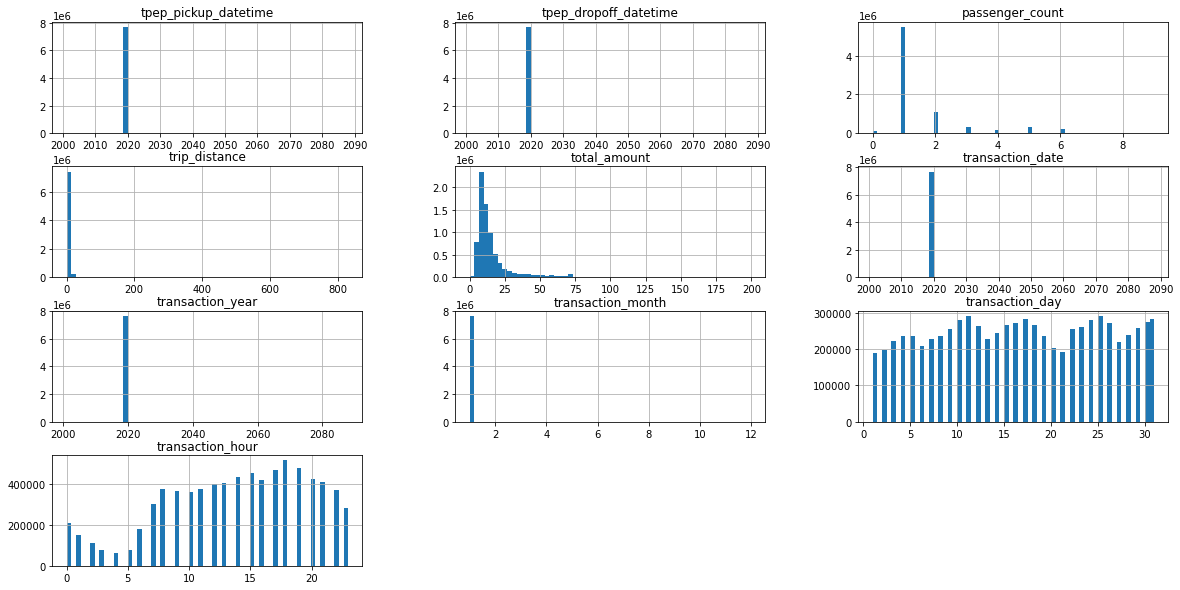

In [35]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)
     #### A look at the data above shows that data points for 2018 is included and I only want to focus on 2019. So, more data cleaning needed.

In [36]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]
     #### This filters the data to extracts only January 2019 data points from the data set considering the dataset comprises upto 2080 haha.

#####  Nothing down categorical and numerical columns

######## Problem and Data formulation

In [37]:
categorical_columns = ['PULocationID','transaction_date','transaction_month', 'transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns
#### The next goal is to prepare the data for the module I will be using which is the benchmark module.
#### The problem definition for this project is to predict the average money people spend for a cab ride in in a certain region of New York in a given hour of a day and a month. However, the dataset is not aggregated because every have the same action which shows different rows for the same hour, region. By aggregating, it gives for every region, every hour of every different day, there is only one line and the total amount there is the mean or the average of all the transactions that happened in that certain day, hour, and region.
#### How is this done? Basically, looking at the numerical values and taking the average of them based on the location and transaction date. (month, day, hour)

In [38]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
##### These ones are the only ones included in the new dataframe. Passenger type, payment type, ratecode ID, and dropoff location were all left behind. Considering the module, I do not think they would be useful. For instance, Using the ratecode, how someone paid or which region the person paid I do not think would improve the module. The reason I kept them so far is because I thought they would be useful although they were helpful because they helped me understand the negative values.
main_taxi_df.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


###### Aggregate data points < br >
###### What are my trying to predict? First I need to transform the data to have a certain format.

In [39]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()
#### By aggregating, the module aggregates any feature regarding the PULocationID and transaction data and match them with the total amount and trip distance. Therefore, for any location ID and transaction date, there is only one transaction total amount. The counter transactions shows how many transactions happened in a transaction hour. E.g 4 people took a taxi within 10 am etc.

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<AxesSubplot:>

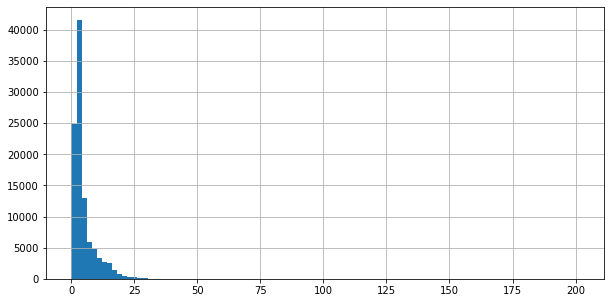

In [40]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<AxesSubplot:>

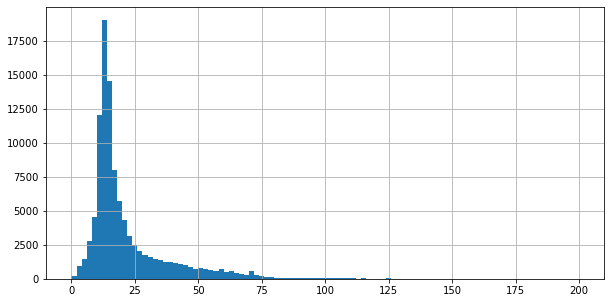

In [41]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

### 5. Benchmark Model

In [42]:
#### ### The essence of a benchmark model is to check if using only the selected features, what level can be achieved. The main purpose is to be able to compare it with the module performance to see if the bvenchmark performs better or not. This would be the baseline.

In [43]:
data_for_benchmark_model = taxi_grouped_by_region.copy()
### A new dataframe is created just incase the things I don't want is created so the main dataframe isn't affected. However, taxi grouped is important because it is useful for the future. 

In [44]:
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.00,21.800,1
1,1,2019-01-01,1,1,5,0.00,87.300,1
2,1,2019-01-01,1,1,6,0.00,80.300,1
3,1,2019-01-01,1,1,8,0.00,128.580,2
4,1,2019-01-01,1,1,10,16.90,43.245,4
...,...,...,...,...,...,...,...,...
102551,98,2019-01-31,1,31,18,16.66,58.060,1
102552,99,2019-01-18,1,18,18,1.66,9.800,1
102553,99,2019-01-26,1,26,8,0.42,6.000,1
102554,99,2019-01-30,1,30,7,2.87,18.050,1


In [45]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'             ### This is the main prediction target
#### When a model is trained, a few things to think about since data is available. The first thing to think about is which ones are the input and target features since thay are what this work is trying to predict. In this case, I used categorical features just for memory sake. You might ask why writing month, day, and hour as categorical when they are numerical. Since i am dealing with January alone which is 1, it is better to leave it this way. Also, if I happen to include other months, this would be useful. Day and hour are the most useful features and again, the reason they are categorical in thos case is because they have circular relationship. For example, hour 0 comes right after hour 12. There are a number of way to deal with circular features.One way is by dividing them into 2 features like x and y, then 0 becomes like 00 so that creates like a circular relationship between them. However, that didn't happen here. I wanted te module to think that every hour is a different entity. 

#### 5.1. Train-test split

In [46]:
import sklearn
from sklearn.model_selection import train_test_split


In [47]:
#### Training the data
X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)
#### After assigning benchmark to the dataset, they are seperated into train or test dataset. Although there is an appraoch how this can be done, however, there is no strict rules about how much dataset one can set aside or test how much dataset one can set aside for train. But its common to do it like 80 to 20% or in that region. Basically, you want to have enough data to train your model but at same time, you want to leave enough dataset for the testing so it dataset can be validated as not too few. In this case, there is enough data points so it is easy to go upto the border amount I can get. 0.33 mean that one third of the dataset is for testing and 42 mean two third is for training. pd.get_dummies mean that I want to one-hot encode my dataset because this model cannot deal with strings or categorical features, hence turning categorical features into numerical ones with which the model can work.


###  5.2. Fit a model to the data

In [48]:
### Training the model
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)
#### If you remove (max_depth=10), it will run the default model. max_depth is a hyper-parameter. Think of every model having nobs and settings and one can work around it e-g, how deep you want your decision tree or how shell you want the branches to seperate or the condition to be there etc. and you can write all of them in here. The goal of machine learning is not to use the default version but to find the optimal hyper-parameter value for any specific problem. Although there exists some rule of thumps, in general, is a trial and error thing which is also called Tunning.

DecisionTreeRegressor(max_depth=10)

## 5.3. Model evaluation

In [49]:
#### Evaluating the metrics
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)   ### using the decision tree model to predict everything that is in the dataset

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))    #### comparing the predicitions to the target value to see how good the model is.
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))
#### The metrics are basically a way of quatifying how good or bad the model is.
#### The mean absolute error is the difference between the prediction and the actual value. E.g if the actual value a rider paid is $20 and the model predicts $15, then the difference is $5 and is absolute because nomatter what the value is, we take the absolute value. Therefore, this predicts dataset predicts -+$3 for the dataset.
#### The mean squared error is the difference between the actual value and the predicting followed by a squaring the value. If there is a bigger difference, it exagerates the dataset better. The bigger the error, the bigger the problem with the model. The smaller the better.
#### Root mean square error is basically the rooted version of the squared error. This is used to check the relationship with the mean absolute error. While exagerating the higher errors, it is important to stay on the same level with the mean absolute error for easy comparison to check for big errors.
#### r2 shows how good the model pattern fits the dataset on a 100% scale. Its between 0 - 1. If r2 is close to 1, it shows the mean value predicting is very good and 1 is perfect. Meaning the model is perfectly fitting the pattern of the dataset.

mean_absolute_error 3.430237963124692
mean_squared_error 64.15134032856466
root_mean_squared_error 8.009453185365693
r2 0.7710721476372687


<AxesSubplot:xlabel='true', ylabel='pred'>

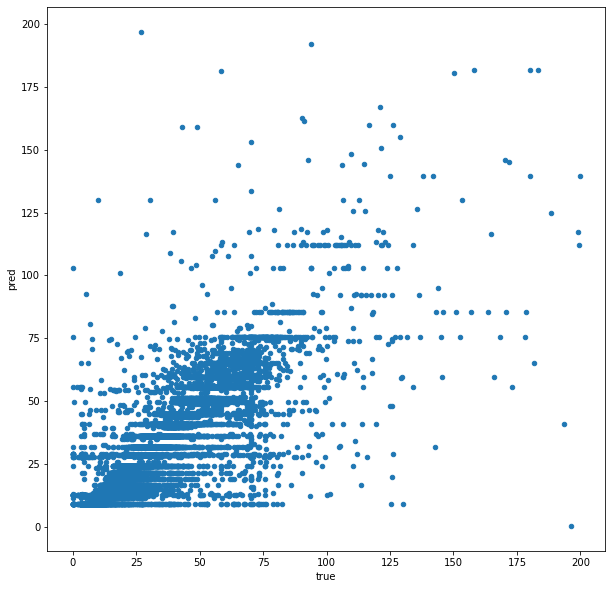

In [50]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(10,10), kind='scatter', x='true', y='pred')
#### From the below plot, x-axis is the true values and y-axis is the predicted values. A linear curve shows it fits perfectly. However this is not the case here although the pattern can be seen from the plot.

In [51]:
#### Some things to note here. In reality, this is a prediction meaning there is no knowledge yet of the trip distance. Therefore using the trip distance as a prediction model in line 43 is like cheating because is kind of a püroxy for total amount and should not be in the model. So, predicting the trip distance or the amount people pay for trips in a region of NY is the goal. Therefore, I will recreate the model excluding trip distance. 

### 5.4. Fix the problem

In [52]:
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
categorical_features_benchmark = [
    'PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark
target_feature_benchmark = 'total_amount'

# Train and test split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)


print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.776803074043126
mean_squared_error 217.18626934573555
root_mean_squared_error 14.737240900037413
r2 0.2249579517849274


<AxesSubplot:xlabel='true', ylabel='pred'>

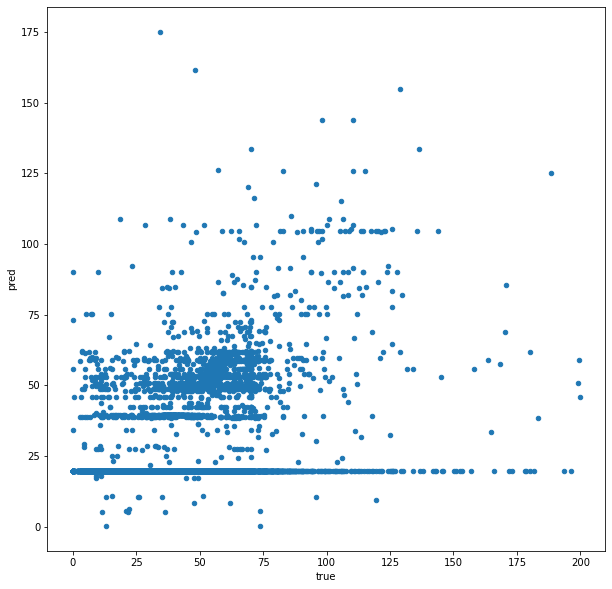

In [53]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(10,10), kind='scatter', x='true', y='pred')

### 6. Generating new feature

In [54]:
taxi_grouped_by_region.head()
#### This is where creativity come into play. First, taking a second look at the data and trying ro generate new information and what I can bring from the outside that would be useful.

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [55]:
data_with_new_features = taxi_grouped_by_region.copy()
#### The second thing is copying the above data to a new dataset that I will be mainly working on and keep the previous dataset original and seperate so I don't mess with it. 

#### Data related features

In [56]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)
##### Considering the transaction date, I can come up with some new feature. E.g. transaction weekday can be a new feature or weekend and considering there is the day of the month and there is no day of the week. Another thing that can be done is to maybe add a boolean maybe a zero or one feature to show if that certain day is a weekend or a weekday.

In [57]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)
#### These pandas packages helps to add a holiday calendar if is is a national holiday. E.g. January 1 is a national holiday atleast for most parts of the world if not all. This is added using the USFederalHolidayCalendar. There are so many resources in python that one can also use to add calendar.

In [58]:
data_with_new_features.head()
#### A look at the new feature.

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


#### Borough Information

In [59]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID', 'Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()
####  This shows which pickup locationID correspond to which borough.

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [60]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [61]:
data_with_new_features['Borough'].value_counts()

Manhattan        740
EWR              271
Bronx            137
Queens            10
Staten Island      5
Name: Borough, dtype: int64

##### Weather related features

In [62]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()
#### Just being creative, I would be more likely to take a cab at night or daytime if its raining. With this in mind, weather data would be useful. It is a 3 hour and not hourly interval weather data from NYC sourced online. There are some missing values and the cloud cover is not really a number which will be represented as a string because of the percentage sign.

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [63]:
nyc_weather.shape


(2936, 6)

###### Dealing with the missing values.

In [64]:
nyc_weather.dtypes
#### The cloud cover which is in string format will be converted to numerical because there is a linear relationship between 70% and 50%.

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [65]:
nyc_weather['cloud cover'].value_counts()
#### This shows for every specific value in the column, how many times it occurred. A nice way to see different types of values in the new dataset.

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [66]:
nyc_weather['amount of precipitation'].value_counts()
#### Not an expert in trace of precipitation but looking at the lowest value which is 0.3, maybe altering the value to 0.1 or 0.2 could be okay considering it does not show alot of rain.

Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
8.0                        13
7.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
29.0                        2
14.0                        2
18.0                        1
35.0                        1
68.0                        1
63.0                        1
30.0                        1
34.0                        1
21.0                        1
25.0                        1
20.0                        1
17.0                        1
24.0                        1
Name: amou

In [67]:
nyc_weather.isna().sum()
#### This shows cloud cover have 4 missing value but that is not alot. However, amount of preciüitation have more than 2000. Considering in trace of precipitation, the higher you go, the less likely it will rain, with that logic, trace precipitation happens more often at 266.

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

###### Trace of precipitation can be thought of as 0.1
###### And the missing values 0


In [68]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)
#### What happened here is that everywhere with precipitation is replaced to 0.1. That way, it is easier to cast the whole column to float so it doesn't have to be string anymore. This problem can be solved by replacing the missing values with zero. This is not feasible in this case considering the missing values are so much. Another way is the backward fill and forward fill which basically takes either the last figure to replace the next figure should no transaction occur in the next hour and vice versa. E.g. You have a value for 4 pm, then you use it to replace values for 2pm or 3pm. However, another better way is interpolation. E.g. if you have one value before the misising value and you have another value after the missing value, you basically draw a linear line and basically take the value that corresponds to the missing one

In [69]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)
##### For the cloud cover, transforming the strings to float value. E.g. 0.1 - 1, is same as 1% - 100%. No clouds = 0, for Sky obscured by fog and/or other meteorological phenomena = 1. At the end of the day, the idea is how this affects a persons decision to take a cab. Also considering Sky obscured by fog and/or other meteorological phenomena happened 3 times in the dataset.


In [70]:
nyc_weather.dtypes
#### The goal hear is to change data and time to day time.

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [71]:
nyc_weather.loc[:, 'date and time'] = pd.to_datetime(nyc_weather.loc[:, 'date and time'])
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day
#### By changing to daytime, thereby recreating hour, month, and day because they would be merged at the end when everything is ready back to the were the taxi transaction information is.

In [72]:
nyc_weather.head()
#### Remember this is a whole different dataset retrieved online. 


,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [73]:
data_with_new_features.head()
#### This is the actual dataset. The goal here to retrieve the features in the above dataset and best them in this dataset by merging them.

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [74]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on=['transaction_month', 'transaction_day', 'transaction_hour'], right_on=['month', 'day', 'hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()
#### This is asking python to merge the features in the weather dataset to any corresponding features in the above dataset by looking at the data points that corresponds to hour, month, day in the weather dataset.


(102556, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [75]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time', 'hour', 'month', 'day'], axis=1)
#### Now, the first thing is to delete the datetime features of the above dataset.

In [76]:
nyc_taxi_with_weather.head()
#### Checking what the new dataset lokks like shows there no unnecessary information. There exists missing values because the data in this is hourly data but the downloaded online weather datapoints is per-3 hours interval. Hence, missing values because the datas do not correspond.


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [77]:
nyc_taxi_with_weather.isna().sum()
#### A look at the missing values shows quite alot are missing in the merged version. What can be done is to interpolate again but first, sort them per day and hour to make sure they are sorted in the right order.


PULocationID                    0
transaction_date                0
transaction_month               0
transaction_day                 0
transaction_hour                0
trip_distance                   0
total_amount                    0
count_of_transactions           0
transaction_week_day            0
weekend                         0
is_holiday                      0
Borough                    101393
temperature                 68371
humidity                    68371
wind speed                  68371
cloud cover                 68371
amount of precipitation     68371
dtype: int64

In [78]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [79]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()
#### After interpolation, the first ones would still be missing because interpolation is basically having two points with a missing middle point and taking the value between to match the missing value. In this case backward filling should work. This fills the missing values in the coilumn using the last value.

PULocationID                0
transaction_date            0
transaction_month           0
transaction_day             0
transaction_hour            0
trip_distance               0
total_amount                0
count_of_transactions       0
transaction_week_day        0
weekend                     0
is_holiday                  0
Borough                    29
temperature                 0
humidity                    0
wind speed                  0
cloud cover                 0
amount of precipitation     0
dtype: int64

In [80]:
nyc_taxi_with_weather.head()
#### There are no missing values from the datapoints. The next thing is to train the models.


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0


### Model Training

In [81]:
data_for_model = nyc_taxi_with_weather.copy()
#### Copying the original dataframe into the new dataframe

In [82]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
        'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
        'amount of precipitation']
target_feature = 'total_amount'
#### Choosing the input and target features seperately. Again, the categorical features are the old ones but new ones were also created like week day, holiday. Also, some numerical features were created like temperatur, humidity and added them to input features. This time trip distance isn't included because it causes leakage. Our target feature remain total amount.

##### Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#### Again spliting the dataset into train and test.


#### 7.1. Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)
#### Using decision tree again since its already used in the benchmark model so its best to try the same settings to see if there's an increase in performance. The reason for 10 is used for max depth

DecisionTreeRegressor(max_depth=10)

In [85]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)


print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))
#### The MAE and RMSE ain't looking bad with a variation of roughly +-5. They are the better estimator here considering this is a predictive analysis. 

mean_absolute_error 9.887694960477877
mean_squared_error 225.2401753325344
root_mean_squared_error 15.00800370910583
r2 0.20601429313733188


<AxesSubplot:xlabel='true', ylabel='pred'>

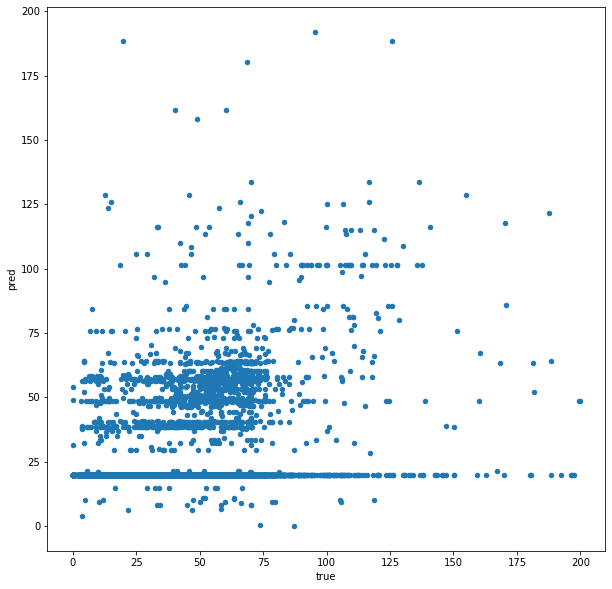

In [86]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(10,10), kind='scatter', x='true', y='pred')

#### Overfit

###### The model fits the training data's pattern so much that it loses the ability to generalise.

In [87]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test


In [88]:
rmse_scores = {'max_depth': [], 'rmse_train': [], 'rmse_test': []}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:   #### Overfitting, max depth is assigned different values as deep as it can go because the settings allows it to.
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)

    model_at_hand_overfit = decision_tree_overfit

    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))

    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))

    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)


2
5
8
10
15
20
30
50
70
100
150


In [89]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,15.762803,16.080695
1,5,15.028817,15.419755
2,8,14.513001,15.038638
3,10,14.171065,14.956737
4,15,13.421688,15.023596
5,20,12.778488,15.253271
6,30,11.861670,15.461078
7,50,10.496830,15.813085
8,70,9.110853,16.232040
9,100,7.220799,16.534043


Text(0, 0.5, 'root mean squared error')

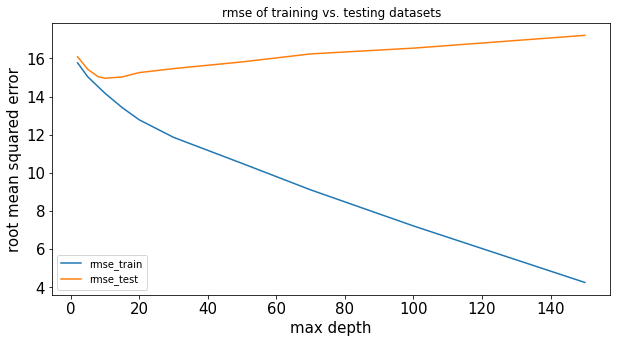

In [90]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10, 5), title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)
#### This plot shows for the max depth that i tried from 2-150, the rooted mean square error 17.5 is worst and 0 is better. The blue line is the error for the training set and orange is the error from test set. From the points the two lines dispersed, if the max-depth is on default, this won't happen. Because there is an attribute, it looses the ability to generalize. However, 10 overfits although decision trees have the ability to overfit. Maybe other algorithms can work here.


#### Underfit

###### Underfit is when the model cannot capture the data's pattern at all


In [91]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test


In [92]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)   #### Underfitting with 1
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)


print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))


mean_absolute_error 11.224804155996338
mean_squared_error 259.4793147563978
root_mean_squared_error 16.10836164097385
r2 0.04897544881556348


In [93]:
# Testing performance

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)


print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))


mean_absolute_error 11.355392253777858
mean_squared_error 267.42797821034117
root_mean_squared_error 16.35322531521966
r2 0.05729964913802943


In [94]:
##### Two other algotithms to try. Random forest and gradient boosting. First, the reason for the algorithms. There are a couple of options online. Based on the problem, check if is a dimentionality redaction problem? Is there responses? Yes, because there is a target value considering this is a supervised learning problem. When predicting numeric, if you consider accuracy, then go with random forest and gradient boosting tree. However, if you consider speed, decision tree and linear regression is best suited. Hence the reason random forest and gradient boosting were used just for comparism because they are different algorithm.

### 7.2. Random forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)
#### This is the default algorithm. Just to see how the algorithm would perform in default mode. Then, by Tunning, the best parameters would be found.

RandomForestRegressor()

In [96]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))
#### The default model looks pretty better than the earlier decision tree analysis.

mean_absolute_error 7.585179094858737
mean_squared_error 183.97268188518112
root_mean_squared_error 13.563652969800618
r2 0.3514847888287572


<AxesSubplot:xlabel='true', ylabel='pred'>

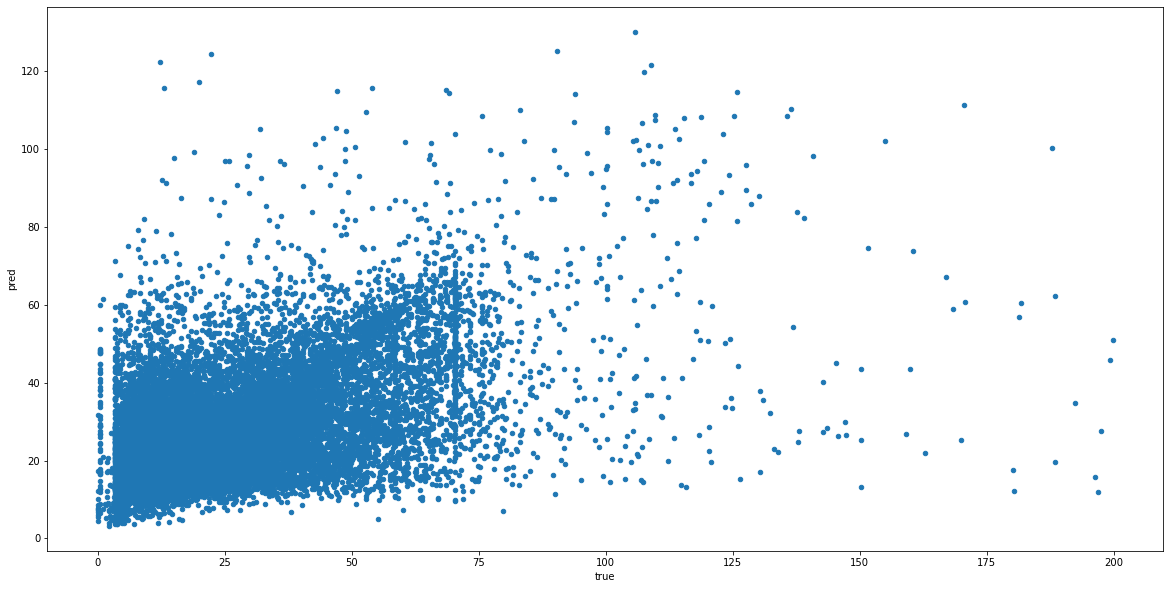

In [97]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### 7.3. Gradient boosting

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)
#### Again, this is the default version of the model.


GradientBoostingRegressor()

In [99]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))
#### The gradient boosting default model also performed better than the earlier decision tree model.


mean_absolute_error 9.511711161429657
mean_squared_error 200.9757777914362
root_mean_squared_error 14.17659260158929
r2 0.2915478122123495


<AxesSubplot:xlabel='true', ylabel='pred'>

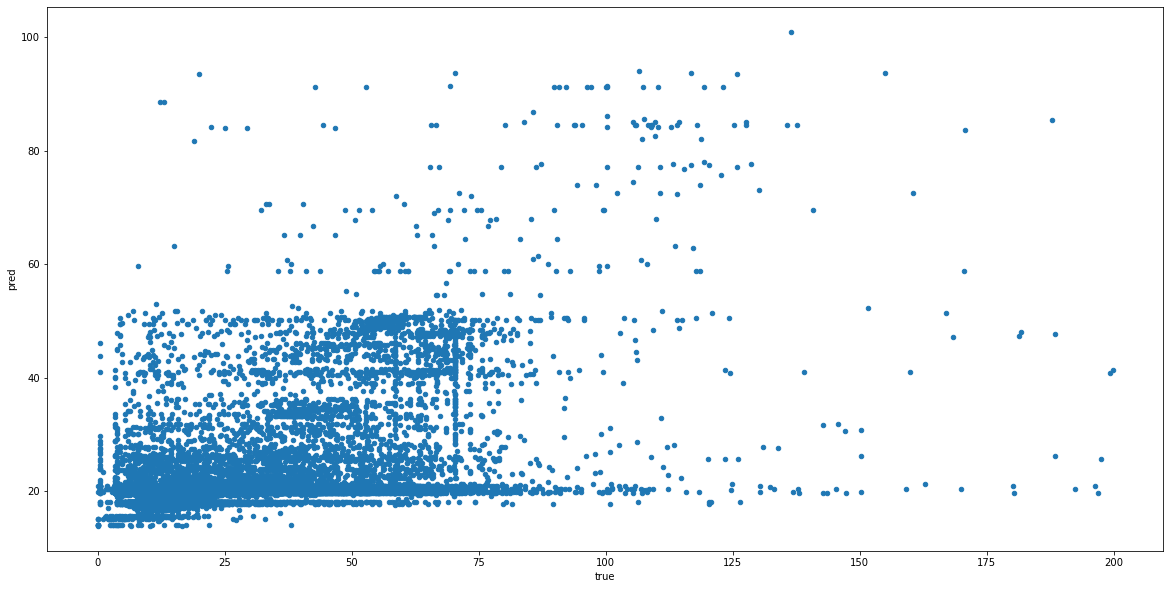

In [100]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<AxesSubplot:>

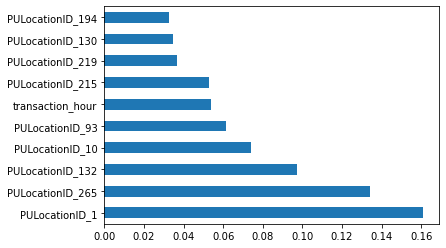

In [101]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))
#### Apparently the algorithm used the pick up location the most. This can be helpful in giving you a clue of which features to use.

### 7.4. Comparing algorithm performances

|    **Algorithm** 	    | **MAE** 	| **RMSE** 	| **R2** 	|
|        ---	        |  ---	    |  ---	    |  ---	    |
| Benchmark model 	    | 9.776 	| 14.737 	| 0.224 	|
| Decision tree 	    | 9.887 	| 15.008 	| 0.206 	|
| Random forest 	    | 7.585 	| 13.563 	| 0.351 	|
| Gradient boosting 	| 9.511 	| 14.176 	| 0.291 	|

##### From the results above, random forest is the best model but not before performing tunning and cross validation. Here, I will be going with random forest and will be tunning the model next.

## 8. Tuning

### 8.1. Finding the best parameter

In [102]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 50, 100, 150, 200, 300, 500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]  ##### Turning bootstrap option on or off to see which one is better.
#### The last thing to do in order to get the best model is to Tune the hyper-parameters of the model I am working on. Like I mentioned before, random forest is the chosen algorithm for the model. I will be finding the right setting for the random forest algorithm that would give the best performance or good performance. The first thing is to go the the algorithm documentation to figure out which parameters of those can I work with. E.g. number of estimators, criterion, max-depth, and minimum sample split

In [103]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)
#### Trying all the parameters would be alot of model training time consumption. Therefore, its not a good idea.


{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [104]:
from sklearn.model_selection import RandomizedSearchCV

### Use the randome grid to search for best hyperparameters
### First create the base model to tune
rf = RandomForestRegressor()
### Random search of parameters, using 3 fold cross validation (cv) ### Cross validation is a way to validate the model is stable. What it does is divide the data into different chunks (in this case 3) and report back the results. Then your able to compare the performance on all three and if they are consistent shows the data is good. If not, something might be wrong with the data.
### Search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train) #### This is only the training set. So it divides the training set into small chunck of test set.

performances = pd.DataFrame.from_dict(rf_random.cv_results_)
#### Instead of working on all the parameters in the previous line of code, what I will do is a random search. What this does is the algorithm choses a random search combinations you inputed and it generates the performances based on the provided input.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [118]:
performances
  #### The interest here is to check if the mean score is good and at same time, std to be low. A high std shows a strong deviation. Where the mean score is 
  #### Now is to find the best model that gives the best performance using the test score rank. Based on the results, the model with the highest mean test score fits the model better. P.S: n_estimators refers to how many tree you have in a random forest. The more trees, the slower the algorithm is going to be.
  #### The results of the model came from training and test sets from the original training set. Therefore, the model have not seen the data points in the test set.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,163.050052,1.165887,3.967398,0.028137,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.392546,0.405611,0.404588,0.400915,0.005933,2
1,18.929659,0.803542,0.588955,0.003456,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.258514,0.271870,0.266716,0.265700,0.005500,8
2,22.254417,0.440513,0.565402,0.009485,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.258054,0.273594,0.267995,0.266548,0.006426,7
3,685.510219,11.334589,1.092964,0.094308,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.265567,0.265605,0.268802,0.266658,0.001516,6
4,3999.500945,130.713491,5.005265,0.112197,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.298776,0.310443,0.322611,0.310610,0.009731,5
5,772.040205,27.816905,18.232532,0.474228,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.367774,0.379460,0.380718,0.375984,0.005828,4
6,67.723593,1.697612,2.218579,0.155544,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.171923,0.180838,0.176883,0.176548,0.003647,10
7,527.015724,10.341760,14.635485,0.627418,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.382109,0.400677,0.395332,0.392706,0.007805,3
8,6404.715301,88.675273,8.581881,0.573236,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.204206,0.217955,0.216917,0.213026,0.006251,9
9,450.126851,23.858834,9.446637,0.494076,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.401984,0.416078,0.415986,0.411349,0.006623,1


In [119]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time
t0 = time.time()

best = RandomForestRegressor(n_estimators=600, min_samples_split=10,
                             min_samples_leaf=2,
                             max_features='sqrt',
                             max_depth=500,
                             bootstrap=True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)


print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))
#### This runs the model in the test set to see if the performance is good. In other words, this is the validating set which is basically a set of data points the model has never seen before.
#### After tuning, testing on the data points to check if the test set is overfitted or everything is good.
#### This gives a mean square performance of 0.42 which is good. However, it took 297.96 seconds to train. 



Time elapsed:  297.969970703125  seconds
mean_absolute_error 7.353992125356615
mean_squared_error 162.37067244222206
root_mean_squared_error 12.742475130139438
r2 0.42763322332495624


In [120]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

import time
t0 = time.time()

second_best = RandomForestRegressor(n_estimators=200, min_samples_split=10,
                                    min_samples_leaf=1,
                                    max_features='sqrt',
                                    max_depth=200,
                                    bootstrap=True)
second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)


print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))
#### This is almost the same mean score to the previous one and it took 107.90 seconds to train. Therefore, I would take the this option because it took less time to train.
#### The r2 score is not objectively good on any model but this specific model. Considering the benchmark model is lower. Another option to find maybe a better r2 is by using the grid serach model. So, for now I'm happy with the result.

Time elapsed:  107.90248703956604  seconds
mean_absolute_error 7.300030280803766
mean_squared_error 162.88673932353583
root_mean_squared_error 12.762708933589915
r2 0.42581405528824434


<AxesSubplot:xlabel='true', ylabel='pred'>

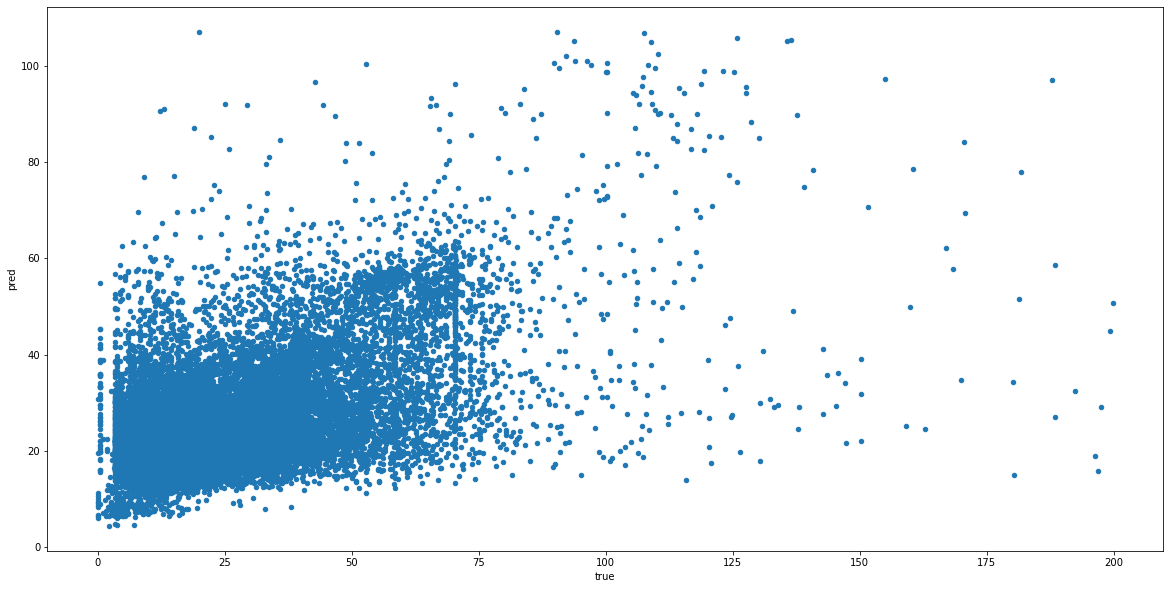

In [121]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')
#### Although this is not a perfect plot, however, what can be done to improve the plot.
#### One thing to keep in mind that could improve the model is going back to feature engineering, you can reduce the focus points on the regions with the highest transaction figures.  Another thing is to focus on the highest number of transactions per hour. Basically, the more concise the data, the better the model result.


### Classification

###### This problem can be transformed into a whole new problem which classifying the given problem into a whole new bucket. Assuming this project came about because New York Taxi Association wants to know where taxi drivers would make the best money so they can divide the taxi drivers to high and low earning region. In this case, the target variable can be put into bins to enable a prediction for high or low income. A practical way to do this this is show below.

<AxesSubplot:>

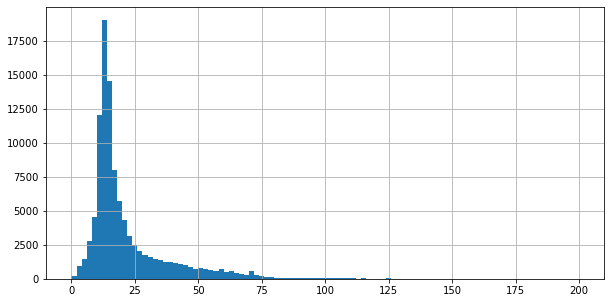

In [122]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10, 5))
#### From the plot, you can see the graph clusters around the $15 income. The assumption here could be that value below $15 is low income and above high income.


In [123]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()
#### Putting the assumption above into the dataset give the breakdown table. Because is very hard for models to work with strings, hence replacing them to 0's and 1's in earning class binary instead of low and high as shown in earning class. Just to add, this data is not new.
#### Also it was a good job dividing it considering too high or too low values makes the dataset inbalance which is bad for the accuracy while model is trained.

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,low,0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,low,0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,low,0


In [124]:
nyc_class['earning_class'].value_counts()


high    53099
low     49457
Name: earning_class, dtype: int64

In [125]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
                        'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
                                         'amount of precipitation']
target_feature = 'earning_class_binary'
#### Dividing the inputs and target features


In [126]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)


In [127]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)
#### Dividing the dataset into train and test.


In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))
#### Training the dataset at default random forest classifier. Then looking at the metrics to check how the result turned out.
#### [[11063  14036] This shows how many times the classification went right. [[5317  3428]] shows how many times it did not turnout right.
#### TRhe accuracy score goes from 0 - 1. The results below shows a pretty good accuracy and tuning this model would get a pretty good score as well. 


[[11063  5317]
 [ 3428 14036]]
accuracy 0.7416085569081668
precision 0.7252622332454917
recall 0.8037104901511681


<AxesSubplot:>

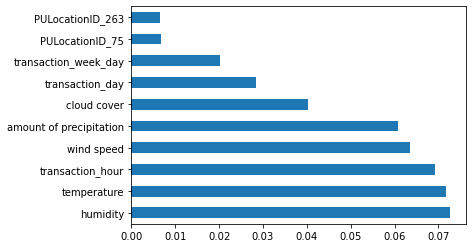

In [129]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))
